In [1]:
import os, json
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

from config import StockformerConfig
from train import train
from inference import init_config, init_model, predict

/home/rajath/miniconda3/envs/stockformer/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
prediction_length = 360
down_sample = min(prediction_length, 30)
load_checkpoint = f'sp500-{prediction_length}d-pre'
config = init_config(load_checkpoint)
model = init_model(config, load_checkpoint)

Loading config checkpoint from path: /home/rajath/nvidia-workbench/stocker/portfolia/models/stockformer/sp500-360d-pre
Loading model checkpoint from path: /home/rajath/nvidia-workbench/stocker/portfolia/models/stockformer/sp500-360d-pre


In [3]:
symbols = ['NVDA']
forecasts = predict(symbols, model, config, prediction_length, down_sample, end_date="2023-07-20")

[*********************100%%**********************]  1 of 1 completed


ValueError: input length 120 and time feature lengths 1729 does not match

[*********************100%%**********************]  1 of 1 completed


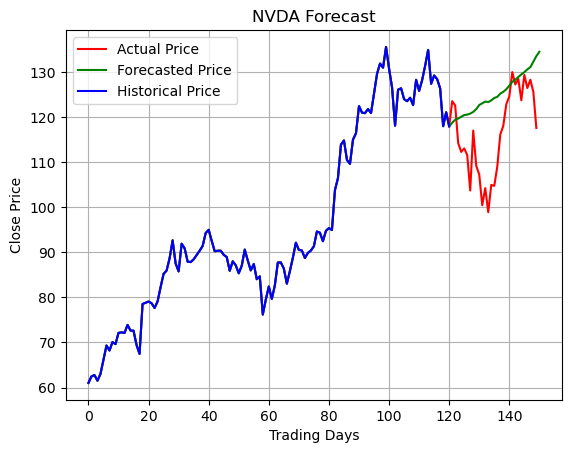

In [13]:
for i, forecast in enumerate(forecasts):
    figure, axes = plt.subplots()

    true_pred = yf.download(
        symbols[i],
        start=forecast['Date'].iloc[0].strftime('%Y-%m-%d'),
        end=forecast['Date'].iloc[-1].strftime('%Y-%m-%d'),
    )

    axes.plot(true_pred['Close'].values, color="red", label="Actual Price")
    axes.plot(forecast['Close'].values, color="green", label="Forecasted Price")
    axes.plot(forecast['Close'].values[:-config.prediction_length], color="blue", label="Historical Price")
    plt.title(f'{symbols[i]} Forecast')
    plt.xlabel('Trading Days')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
for i, forecast in enumerate(forecasts):
    figure, axes = plt.subplots()

    true_pred = yf.download(
        symbols[i],
        start=forecast['Date'].iloc[0].strftime('%Y-%m-%d'),
        end=forecast['Date'].iloc[-1].strftime('%Y-%m-%d'),
    )

    axes.plot(true_pred['Close'].values[:-1], color="red", label="Actual Forecasted Price")
    axes.plot(forecast['Close'], color="green", label="Predicted Forecasted Price")
    axes.plot(forecast['Close'].values[:-config.prediction_length], color="blue", label="Historical Price")
    plt.title(f'{symbols[i]} Forecast')
    plt.xlabel('Trading Days')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
for i, forecast in enumerate(forecasts):
    figure, axes = plt.subplots()

    true_pred = yf.download(
        symbols[i],
        start=forecast['Date'].iloc[0].strftime('%Y-%m-%d'),
        end=forecast['Date'].iloc[-1].strftime('%Y-%m-%d'),
    )

    axes.plot(true_pred['Close'].values[:-1], color="red", label="Actual Forecasted Price")
    axes.plot(forecast['Close'], color="green", label="Predicted Forecasted Price")
    axes.plot(forecast['Close'].values[:-config.prediction_length], color="blue", label="Historical Price")
    plt.title(f'{symbols[i]} Forecast')
    plt.xlabel('Trading Days')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()